In [9]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt

from datetime import datetime, timedelta

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Data loading

In [10]:
#data = pd.read_csv('rains.csv', index_col =0)
data = pd.read_csv('rains.csv')
data = data.sort_values(by='Date',ascending = True)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6383,2007-11-01,Canberra,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,...,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6,No,Yes
6384,2007-11-02,Canberra,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,...,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7,Yes,Yes
6385,2007-11-03,Canberra,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,...,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2,Yes,Yes
6386,2007-11-04,Canberra,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,...,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1,Yes,Yes
6387,2007-11-05,Canberra,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,...,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4,Yes,No


In [11]:
data.Date.min()

'2007-11-01'

In [12]:
data.Date.max()

'2017-06-25'

# Data pre-processing

data exploration

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25631 entries, 6383 to 25630
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           25631 non-null  object 
 1   Location       25631 non-null  object 
 2   MinTemp        24781 non-null  float64
 3   MaxTemp        24885 non-null  float64
 4   Rainfall       24570 non-null  float64
 5   Evaporation    16385 non-null  float64
 6   Sunshine       16142 non-null  float64
 7   WindGustDir    21009 non-null  object 
 8   WindGustSpeed  21011 non-null  float64
 9   WindDir9am     23020 non-null  object 
 10  WindDir3pm     23947 non-null  object 
 11  WindSpeed9am   25073 non-null  float64
 12  WindSpeed3pm   24389 non-null  float64
 13  Humidity9am    24800 non-null  float64
 14  Humidity3pm    24141 non-null  float64
 15  Pressure9am    21854 non-null  float64
 16  Pressure3pm    21852 non-null  float64
 17  Cloud9am       16480 non-null  float64
 18  Clo

In [14]:
data.Date = pd.to_datetime(data.Date)
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,24781.000000,24885.000000,24570.000000,16385.000000,16142.000000,21011.000000,25073.000000,24389.000000,24800.000000,24141.000000,21854.000000,21852.000000,16480.000000,15527.000000,24883.000000,24183.000000
mean,13.255958,23.627928,2.568637,5.180128,7.598346,38.323021,12.250668,17.501989,66.912621,51.880742,1018.254873,1015.802009,4.214078,4.237264,17.850520,22.018224
std,5.828184,5.911984,8.955230,3.421251,3.796346,13.483681,9.282323,9.349560,16.448132,17.757020,6.786389,6.637024,2.858866,2.699229,5.931133,5.722596
min,-8.000000,4.100000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,3.000000,4.000000,982.300000,985.500000,0.000000,0.000000,-1.300000,3.700000
25%,9.500000,19.400000,0.000000,2.600000,4.800000,30.000000,6.000000,11.000000,56.000000,40.000000,1013.700000,1011.300000,1.000000,1.000000,13.600000,18.000000
50%,13.500000,23.500000,0.000000,4.600000,8.500000,37.000000,11.000000,17.000000,67.000000,52.000000,1018.200000,1015.800000,5.000000,5.000000,17.800000,21.900000
75%,17.600000,27.700000,0.800000,7.200000,10.500000,46.000000,17.000000,22.000000,78.000000,63.000000,1022.800000,1020.300000,7.000000,7.000000,22.300000,25.900000
max,33.900000,46.400000,240.000000,44.000000,13.900000,122.000000,130.000000,87.000000,100.000000,100.000000,1040.600000,1037.900000,9.000000,8.000000,39.000000,45.400000


In [15]:
print(data.Location.unique())
print("8 Locations")
data.Location.value_counts()

['Canberra' 'Sydney' 'Perth' 'Brisbane' 'Adelaide' 'Melbourne' 'Newcastle'
 'GoldCoast']
8 Locations


Canberra     3436
Sydney       3344
Perth        3193
Brisbane     3193
Melbourne    3193
Adelaide     3193
GoldCoast    3040
Newcastle    3039
Name: Location, dtype: int64

In [16]:
# creation of one specific DataFrame per location
data_canberra =  data[data['Location']=='Canberra']
data_sydney =  data[data['Location']=='Sydney']
data_perth =  data[data['Location']=='Perth']
data_brisbane =  data[data['Location']=='Brisbane']
data_adelaide =  data[data['Location']=='Adelaide']
data_melbourne =  data[data['Location']=='Melbourne']
data_newcastle =  data[data['Location']=='Newcastle']
data_goldcoast =  data[data['Location']=='GoldCoast']
data_canberra.isna().sum()

Date                0
Location            0
MinTemp             6
MaxTemp             3
Rainfall           18
Evaporation      1604
Sunshine         1915
WindGustDir       339
WindGustSpeed     337
WindDir9am        541
WindDir3pm        228
WindSpeed9am      229
WindSpeed3pm      223
Humidity9am        63
Humidity3pm        12
Pressure9am       226
Pressure3pm       221
Cloud9am         1072
Cloud3pm         1263
Temp9am            18
Temp3pm             7
RainToday          18
RainTomorrow       18
dtype: int64

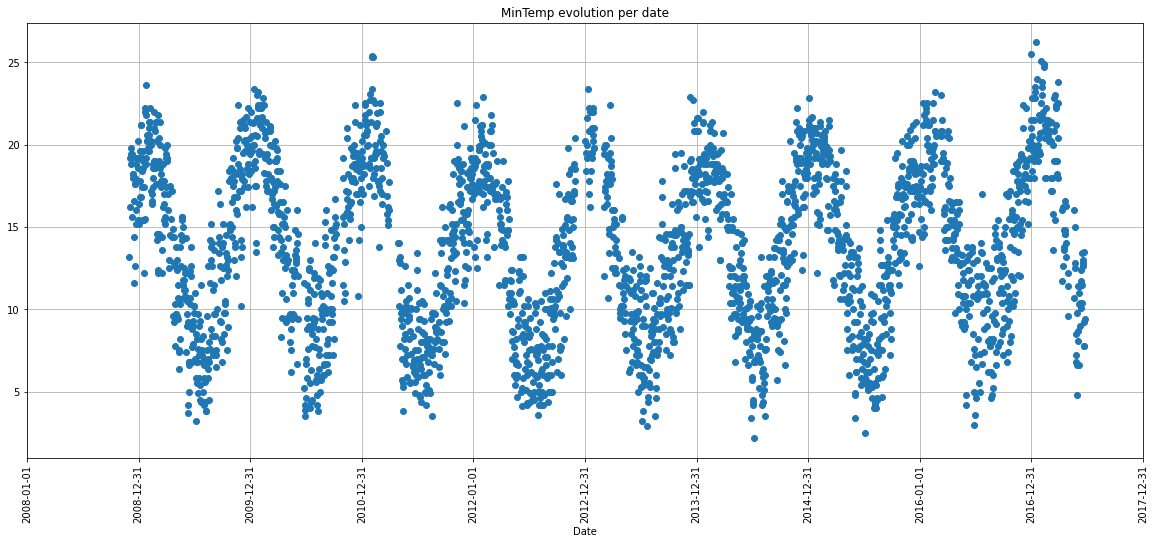

In [17]:
# visualisation of one parameter evolution during the time at a specific location
data_city = data_newcastle #Newcastle
parameter = "MinTemp"

dt = np.arange(datetime(2008,1,1), datetime(2018,1,1), timedelta(days=365.25)).astype(datetime)
fig = plt.figure(1,figsize =(20,8))
plt.plot_date(data_city.Date, data_city[parameter]  )
plt.title(f'{parameter} evolution per date')
plt.xlabel('Date')
plt.xticks(dt, rotation=90)
plt.grid()
plt.show()

data cleansing

In [18]:
data.shape[0]

25631

In [19]:
data.isna().sum()/data.shape[0]

Date             0.000000
Location         0.000000
MinTemp          0.033163
MaxTemp          0.029105
Rainfall         0.041395
Evaporation      0.360735
Sunshine         0.370216
WindGustDir      0.180329
WindGustSpeed    0.180250
WindDir9am       0.101869
WindDir3pm       0.065702
WindSpeed9am     0.021771
WindSpeed3pm     0.048457
Humidity9am      0.032422
Humidity3pm      0.058133
Pressure9am      0.147361
Pressure3pm      0.147439
Cloud9am         0.357029
Cloud3pm         0.394210
Temp9am          0.029183
Temp3pm          0.056494
RainToday        0.041395
RainTomorrow     0.041434
dtype: float64

In [20]:
## drop rows where target is empty

data.dropna(subset=['RainTomorrow'], inplace=True)

In [21]:
data.isna().sum()/data.shape[0]

Date             0.000000
Location         0.000000
MinTemp          0.012373
MaxTemp          0.007082
Rainfall         0.013839
Evaporation      0.368025
Sunshine         0.378648
WindGustDir      0.181611
WindGustSpeed    0.181530
WindDir9am       0.101958
WindDir3pm       0.064960
WindSpeed9am     0.019903
WindSpeed3pm     0.047214
Humidity9am      0.011559
Humidity3pm      0.037812
Pressure9am      0.130612
Pressure3pm      0.130530
Cloud9am         0.337498
Cloud3pm         0.375188
Temp9am          0.008344
Temp3pm          0.036143
RainToday        0.013839
RainTomorrow     0.000000
dtype: float64

In [22]:
data.Location.unique()

array(['Canberra', 'Sydney', 'Perth', 'Brisbane', 'Adelaide', 'Melbourne',
       'Newcastle', 'GoldCoast'], dtype=object)

In [23]:
data_canberra = data_canberra.ffill().bfill().fillna(0)
data_sydney = data_sydney.ffill().bfill().fillna(0)
data_perth = data_perth.ffill().bfill().fillna(0)
data_brisbane = data_brisbane.ffill().bfill().fillna(0)
data_adelaide = data_adelaide.ffill().bfill().fillna(0)
data_melbourne = data_melbourne.ffill().bfill().fillna(0)
data_newcastle = data_newcastle.ffill().bfill().fillna(0)
data_goldcoast = data_goldcoast.ffill().bfill().fillna(0)

# data_C = data_C.fillna(method="ffill")
# data_A = data_A.fillna(method="ffill")
# data_N = data_A.fillna(method="ffill")
# data_A = data_A.fillna(0)
# data_N = data_N.fillna(0)
# data_G = data_G.fillna(0)

data_melbourne.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [24]:
df = pd.concat([data_canberra,data_sydney,data_perth,data_brisbane,data_adelaide,data_melbourne,data_newcastle,data_goldcoast], ignore_index=True)
df.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

encoding of categorial values using one hot encoding

In [25]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].unique())
    
# print(data_all.Location.unique())
# print(data_all.WindGustDir.unique())
# print(data_all.WindDir9am.unique())
# print(data_all.WindDir3pm.unique())
# print(data_all.RainToday.unique())
# print(data_all.RainTomorrow.unique())

['Canberra' 'Sydney' 'Perth' 'Brisbane' 'Adelaide' 'Melbourne' 'Newcastle'
 'GoldCoast']
['NW' 'ENE' 'SSE' 'SE' 'E' 'S' 'N' 'WNW' 'ESE' 'NE' 'NNE' 'NNW' 'SW' 'W'
 'WSW' 'SSW' 0.0]
['SW' 'E' 'N' 'WNW' 'SSE' 'SE' 'S' 'WSW' 'NNE' 'NNW' 'ENE' 'SSW' 'NW'
 'ESE' 'NE' 'W']
['NW' 'W' 'NNE' 'ESE' 'E' 'ENE' 'WSW' 'NE' 'NNW' 'SE' 'S' 'SW' 'WNW' 'N'
 'SSW' 'SSE']
['No' 'Yes']
['Yes' 'No']


### 1st Approach

In [26]:
# dico_city = {'Canberra':1, 'Sydney':2, 'Perth':3, 'Brisbane':4, 'Adelaide':5, 'Melbourne':6, 'Newcastle':7,'GoldCoast':8}
# dico_dir = {"N":0, "NNE":22.5, "NE":45, "ENE":67.5, "E": 90, "ESE":112.5,  "SE" :135, "SSE":157.5, "S":180, "SSW":202.5, "SW": 225,"WSW":247.5, "W" :270, "WNW":292.5, "NW": 315,"NNW":337.5}   
# dico_bool = {"Yes":1, "No":0}

In [27]:
# data_all.Location = data_all.Location.map(dico_city)
# data_all["WindGustDir"] =  data_all["WindGustDir"].map(dico_dir)
# data_all["WindDir9am"] =  data_all["WindDir9am"].map(dico_dir)
# data_all["WindDir3pm"] =  data_all["WindDir3pm"].map(dico_dir)
# data_all["RainToday"] =  data_all["RainToday"].map(dico_bool)
# data_all["RainTomorrow"] =  data_all["RainTomorrow"].map(dico_bool)

# #data_all[["WindGustDir","WindDir9am","WindDir3pm"]] = data_all[["WindGustDir","WindDir9am","WindDir3pm"]].map(dico_dir)
# #data_all["RainToday","RainTomorrow"] = data_all["RainToday","RainTomorrow"].map(dico_bool)
# data_all.head()

In [28]:
# data_all['Year'] = data_all['Date'].dt.year 
# data_all['Month'] = data_all['Date'].dt.month
# data_all['Day'] = data_all['Date'].dt.day
# data_all = data_all.drop(['Date'], axis =1)
# data_all.head()

In [29]:
# %%time 
# data_all.info()

### 2nd Approach => Encoding

In [30]:
data_encoded = df.copy()

# categorical columns to encode except target variable
col_to_encode = list(data_encoded.select_dtypes(include='object').columns[:-1])

# generate binary values using get_dummies
df_encoded = pd.get_dummies(data_encoded, columns=col_to_encode)


In [31]:
df_encoded.columns

Index(['Date', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainTomorrow', 'Location_Adelaide',
       'Location_Brisbane', 'Location_Canberra', 'Location_GoldCoast',
       'Location_Melbourne', 'Location_Newcastle', 'Location_Perth',
       'Location_Sydney', 'WindGustDir_0.0', 'WindGustDir_E',
       'WindGustDir_ENE', 'WindGustDir_ESE', 'WindGustDir_N', 'WindGustDir_NE',
       'WindGustDir_NNE', 'WindGustDir_NNW', 'WindGustDir_NW', 'WindGustDir_S',
       'WindGustDir_SE', 'WindGustDir_SSE', 'WindGustDir_SSW',
       'WindGustDir_SW', 'WindGustDir_W', 'WindGustDir_WNW', 'WindGustDir_WSW',
       'WindDir9am_E', 'WindDir9am_ENE', 'WindDir9am_ESE', 'WindDir9am_N',
       'WindDir9am_NE', 'WindDir9am_NNE', 'WindDir9am_NNW', 'WindDir9am_NW',
       'WindDir9am_S', 'WindDir9am_SE', 'WindDir9am_SS

In [32]:
df_encoded['Year'] = df_encoded['Date'].dt.year 
df_encoded['Month'] = df_encoded['Date'].dt.month
df_encoded['Day'] = df_encoded['Date'].dt.day
df_encoded.drop(['Date'], axis =1, inplace=True)

In [33]:
df_encoded

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,Year,Month,Day
0,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,...,0,0,0,0,0,1,0,2007,11,1
1,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,...,0,0,1,0,0,0,1,2007,11,2
2,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,...,0,0,0,0,0,0,1,2007,11,3
3,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,...,0,0,1,0,0,0,1,2007,11,4
4,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,...,0,0,0,0,0,0,1,2007,11,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25626,14.2,22.7,0.0,0.0,0.0,35.0,13.0,28.0,66.0,69.0,...,0,0,0,0,0,1,0,2017,6,21
25627,13.7,22.5,0.0,0.0,0.0,39.0,11.0,26.0,66.0,51.0,...,0,0,0,0,0,1,0,2017,6,22
25628,13.0,22.7,0.0,0.0,0.0,24.0,9.0,13.0,66.0,49.0,...,0,0,0,0,0,1,0,2017,6,23
25629,11.8,24.3,0.0,0.0,0.0,31.0,15.0,11.0,65.0,52.0,...,0,0,0,0,0,1,0,2017,6,24


# Classification Model

## Train test split

In [34]:
# Splitting data using time-based splitting in test and train datasets
train_set, test_set= np.split(df_encoded, [int(.80 *len(df_encoded))])

y_train = train_set.RainTomorrow
X_train = train_set.drop(['RainTomorrow'], axis =1)

y_test = test_set.RainTomorrow
X_test = test_set.drop(['RainTomorrow'], axis =1)


In [35]:
y_train.isna().sum()

0

## Standardisation

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_train_scaled = scaler.fit_transform(X_train)
df_test_scaled = scaler.transform(X_test)

## Logistic Regression

In [37]:
clf = LogisticRegression(C=1)
clf.fit(df_train_scaled, y_train)

print(clf.score(df_train_scaled, y_train))
print(clf.score(df_test_scaled, y_test))
y_pred_clf = clf.predict(df_test_scaled)

0.8507120561841592
0.7899356348741955


/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
pd.crosstab(y_test, y_pred_clf, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,No,Yes
Classe réelle,,
No,3683,114
Yes,963,367


## Support Vector

In [39]:
from sklearn import svm
svm =  svm.SVC(gamma=0.01, kernel='poly') 
svm.fit(df_train_scaled , y_train)

print(svm.score(df_train_scaled, y_train))
print(svm.score(df_test_scaled, y_test))

0.8729516191962544
0.7558026136141993


## KNN

In [40]:
from sklearn import neighbors, datasets
knn = neighbors.KNeighborsClassifier(n_neighbors=7, metric ='minkowski')
knn.fit(df_train_scaled, y_train)

print(knn.score(df_train_scaled, y_train))
print(knn.score(df_test_scaled, y_test))

0.8428111587982833
0.7421494051102009


## Decision Tree

In [41]:
# Scale, Standardize, or Normalize not needed with ensemble algos

from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=321)
dtc.fit(X_train, y_train)

print(dtc.score(X_train, y_train))
print(dtc.score(X_test, y_test))

0.8492976980101443
0.7589233469865418


## Boosting

In [42]:
# Scale, Standardize, or Normalize not needed with ensemble algos

from sklearn.ensemble import  AdaBoostClassifier 
ac = AdaBoostClassifier( base_estimator=dtc,n_estimators=400)
ac.fit(X_train, y_train)

print(ac.score(X_train, y_train))
print(ac.score(X_test, y_test))

## Random Forest

In [ ]:
# Scale, Standardize, or Normalize not needed with ensemble algos

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=-1, random_state=321)
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.6899358658115442


In [ ]:

rfc = RandomForestClassifier(n_estimators= 300,
                            max_depth = 300,
                            min_samples_split = 2,
                            min_samples_leaf = 1,
                            max_features = "log2"
                            )
rfc.fit(X_train, y_train)

print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.7289097187962507


In [ ]:

y_pred_rfc = rfc.predict(X_test)
pd.crosstab(y_test, y_pred_rfc, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,No,Yes
Classe réelle,,
No,4641,1372
Yes,826,1269


## Catboost : no encoding needed